# Lecture 4 - How big will our model error be?

### Hosted and maintained by [SAAS Berkeley](saas.berkeley.edu)

*Authored by Joseph Jin*


Let's model the error... for our model. (amiright) 😎


Suppose we have a set of points $x_i$ and $y_i$ s.t. $y_i = f(x_i) + \epsilon$ and $\epsilon$ ~ $N(0, \sigma^2)$

  
**$x_i$: Individual data points (inputs) in our dataset.**


**$y_i$: The corresponding output (target variable) for each $x_i$.**


**$f(x_i)$: Represents the true underlying relationship or function that describes how our input $x_i$ relates to the output 
$y_i$. Many times, this true function is unknown to us.**

**$\epsilon$: Represents the error term.**

**$N(0, \sigma^2)$: The Gaussian (normal) distribution. This has not been discussed in class, but this is vital for the problem setup. In simple terms, the notation above means that the errors (or deviations from the true function ($f$) are random, centered around 0, and spread out with a variability described by $\sigma^2$. You can read more about the normal distribution [here](https://www.w3schools.com/statistics/statistics_normal_distribution.php), or through other resources, such as the [Data 8 Textbook](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).**

Let's call every possible set of $N(x_i, y_i)$ data points a dataset $D$.


When we create predictive models, one of our primary goals is to **minimize the error**. The total error in our model can be thought of as a combination of two main components: Bias and Variance.

1. **Bias**: the model does not capture the relationship between input and output. (Ex: Using a lower order model to predict a higher relationship.)
   - *High bias can cause the model to miss relevant relations between the input and output variables, leading to underfitting.*



2. **Variance**: the model is sensitive to noise in the training data. (Ex: Using a higher order model to predict a lower relationship.)
   - *High variance can cause overfitting: modeling the random noise in the training data rather than the intended outputs.*
   - *A model with high variance will perform well on the training data but poorly on new, unseen data.*

**Notationally:**

$Bias_{D,x}[h(x)] = E_{D,x}[h(x) - f(x)]$

- *Bias quantifies how much, on average, our predictions $h(x)$ differ from the trues values $f(x).$*

$Var_D[h(x)] = E_{D, x}[(E_D[h(x)]- h(x))^2]$

- *Variance quantifies how much our predictions for a particular input $x$ "vary" across different datasets $D$.*



**$h(x):$ Represents our predictive model. What the algorithm predicts the output to be for a given input.**

**$f(x):$ The true function or real relationship between x and the output.**

**$E$: Expectation. This has not been discussed in class, but you can think of this as the average value or mean of a random variable, where the random variable is our observed data. This is an extremely watered-down explanation, but the [Data 140 Textbook](http://prob140.org/textbook/content/README.html) goes over expectation very well, and in much greater detail!**

## We can model error using "bias-variance tradeoff"!

![Bias Variance](biasvariance.png)

Suppose we have a dataset consisting of paired data points $x_i$ (inputs) and $y_i$ (outputs) such that $y_i = f(x_i) + \epsilon$ and $\epsilon$ ~ $N(0, \sigma^2)$.

**$\epsilon$ is our residual!**

- *Remember from last week when we discussed residuals in the context of simple linear regression. In real-world scenarios, our observed outputs $y_{i}$ won't be perfectly reflective of $f(x_{i})$ due to unpredictable factors. We use $\epsilon$ to capture these differences or discrepancies.*

- *Also recall last week when we explored the squared error: this is a measure of how far off our predictions are from the actual values. In other words, for each data point, we **square the difference** (or error) **between the predicted and actual values.***

So... how big is our squared error expected to be??? 🤔 

- *This is the same as saying: "On average, how much will our model's predictions deviate from the true values, when considering the squared differences?"*

Let's say we fit some $h(x)$ to our data.


![bias_variance_tradeoff](bias_variance_tradeoff.jpeg)

We consider this a trade-off because reducing bias usually increases variance and vice versa.

*Understanding this conceptually is very important: **as we make our model more complex to reduce bias, it often becomes more sensitive to the training data, increasing variance, and vice versa.***

## Let's Contextualize This

How do we know how well our model performs?

**We can split our dataset into a training and valuation set.**

*When designing a model to perform a prediction, it's important to know how well they will perform on new, unseen data, generalized data. We simulate this by splitting our available dataset into two distinct parts: a training and validation set.*

1. Fit the model to the training set.

2. Evaluate the model accuracy on the validation set.

### Load Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("WHR2023.csv")
df.head(3)

Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    71.15                         0.961      -0.019   
1                    71.25                         0.934       0.134   
2                    72.05                         0.936       0.211   

   Perceptions of corruption  Ladder score in Dystopia  
0                      0.182                     1.778  
1                      0.196                     1.778  
2                      0.668                     1.778

## Create the Linear Regression Model

Here we use linear regression, just like lecture 3.

However, instead of using one scalar value to predict another, we're going to use multiple inputs to predict one value.

Here, we want to use `Ladder score`, `Logged GDP per capita`, and `Social support`, etc. to predict life expectancy.

**How?**

Underneath the hood, we're still using a linear equation, but now we have multiple input variables.

- *Linear regression can be thought of as drawing a **line** (in 2D) or a plane (in 3D) to fit our data points as closely as possible. When we expand this concept to more than two variables, we're fitting a hyperplane in a multi-dimensional space. While it may sound complex, the underlying principle remains the same. Here, instead of using just one input to make our prediction, we're now considering multiple factors simultaneously. This was hinted at during last week's homework assignment: we observed the consequences of relying on just one feature, especially when our data spans multiple dimensions (large error).*

<img src="mlr.gif" width="400" height="300" style="display:inline" />
<img src="slr.gif" width="300" height="300" style="display:inline" />


Our model will look something like this:

$a_1 * (ladder\ score) + a_2 * (gdp\ per\ capita) + a_3 * (social) + ... + b = life\ expectancy$

Whereas before we used only one input variable:

$a * (social\ support) + b = ladder\ score$

- *This is called **Multiple Linear Regression**. The weights $a_{1}, a_{2}, a_{3}, ...,$ determine how a change in each respective input variable would influence the predicted life expectancy. The $b$ term is the intercept and represents the predicted life expectancy when all input variables are zero (though in many real-world contexts, an intercept of this nature might not have a practical interpretation).*

In [8]:
from sklearn.model_selection import train_test_split

feature_cols = [
    'Ladder score',
    'Logged GDP per capita', 
    'Social support',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]
target_col = 'Healthy life expectancy'

df = df.dropna(subset=feature_cols+[target_col])

# Create features (X) and labels (y)
X = df[feature_cols]
y = df[target_col]

# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=996)
print(X_train.shape, y_train.shape)
print(X_eval.shape, y_eval.shape)

(108, 6) (108,)
(28, 6) (28,)


**A Different way of thinking:**

We can think of our inputs and outputs in terms of vectors and matrices.

**$X$ is a matrix where each row is a data point ($x_i$) and each column is a feature.**

**$y$ is a vector where each element corresponds to the output of some $x_i$.**

**$w$ is a vector of weights we want to produce.**


So we want to find a vector of weights $w$ s.t. we get close to $Xw = y$.

In other words, we want to find a w that minimizes the squared error between $Xw$ and $y$:

argmin$_{w} ||Xw - y||^2$

- *Remember, our goal for simple linear regression was to minimize the difference (or error) between our model's predictions and the actual values. We're doing the same thing here, except in higher dimensions. we're trying to adjust the values in $w$ so that the line, plane, or hyperplane defined by $Xw$ is as close as possible to our actual data points in $y$.*

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the evaluation set
y_pred = linear_model.predict(X_eval)

# Calculate the Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_eval, y_pred)
print(f"Mean Squared Error: {mse_linear}")

Mean Squared Error: 14.408591884377985


Nice.

But what if our model is picking up too much noise??? We don't want to the weights to be overly sensitive to noise.

We can use ridge regression, which penalizes large weights:

argmin$_w ||Xw - y||^2 + \lambda ||w||^2$

vs vanilla linear regression from before:

argmin$_w ||Xw - y||^2$

The bigger $\lambda$ is, the more we penalize large weights. This means the model will fit less to noise, reducing variance. However, this also means the model will be less flexible, increasing bias.

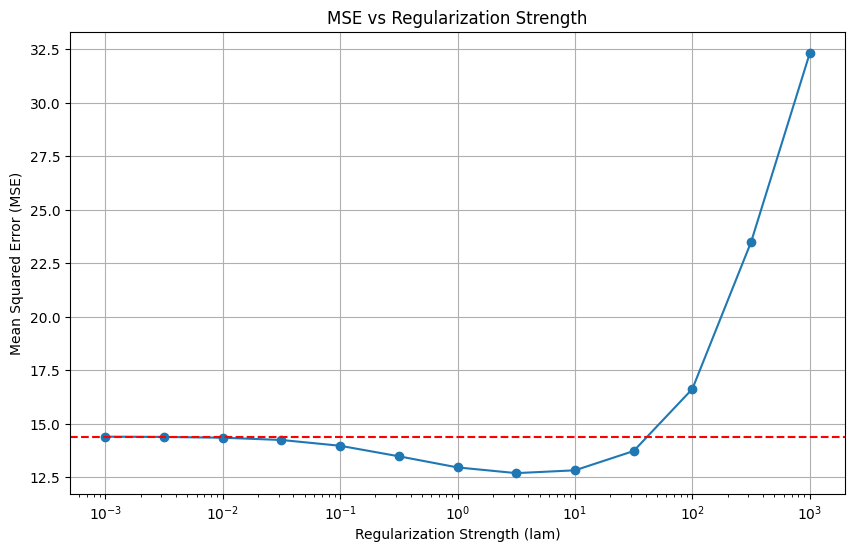

In [5]:
from sklearn.linear_model import Ridge

# Define a range of alpha values
lams = np.logspace(-3, 3, 13)

# List to store MSE values for each alpha
mse_values = []

# Perform Ridge Regression for each alpha value
for lam in lams:
    ridge_model = Ridge(alpha=lam)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_eval)
    mse = mean_squared_error(y_eval, y_pred)
    mse_values.append(mse)

# Plotting MSE vs alpha
plt.figure(figsize=(10, 6))
plt.plot(lams, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (lam)')
plt.axhline(y=mse_linear, color='r', linestyle='--', label='Linear Regression Baseline')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Regularization Strength')
plt.grid(True)
plt.show()